##Classify the handwritten digits



### Importing the data sets

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from math import sqrt
from time import time
%matplotlib inline

In [2]:
#importing the datasets in pandas
train = pd.read_csv("C:/Users/Michael/Desktop/ML_python/kaggle/train.csv", sep=',')
test = pd.read_csv("C:/Users/Michael/Desktop/ML_python/kaggle/test.csv", sep=',')



In [4]:
#size of the dataframes
print train.shape
print test.shape

(42000, 785)
(28000, 784)


In [5]:
# check the proportion of each target classes to detect some class imbalance
for i in set(train['label']):
    print("label "+str(i)+":", len(train[train.label == i]))

('label 0:', 4132)
('label 1:', 4684)
('label 2:', 4177)
('label 3:', 4351)
('label 4:', 4072)
('label 5:', 3795)
('label 6:', 4137)
('label 7:', 4401)
('label 8:', 4063)
('label 9:', 4188)


There is comparable number of rows for each target classes. Thus no class imbalance

###Plotting some digits

In [6]:
#image size:
sqrt(len(train.iloc[0,1:]))

28.0

Each row correspond to a target label `train.iloc[:,0]` and 784 pixels values. Pixel values can be reshaped (`.reshape()`) into a 28 x 28 array.

In [7]:
# first select some random images (9)
indices = np.random.random_integers(0, high=len(train.iloc[:,0]), size=9)
print indices

[25658  8058 27247 41470 11404 31774 23122 26046 19304]


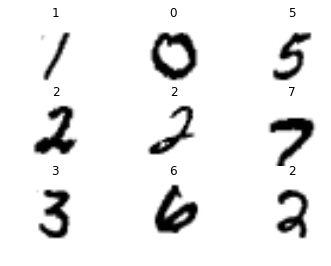

In [8]:
#plt a 3 x 3 panel after reshaping the rows
for i in range(len(indices)):
   plt.subplot(3,3, i+1)
   plt.axis('off')
   plt.imshow(train.iloc[indices[i],1:].reshape((28,28)), cmap=plt.cm.gray_r)
   plt.title(train.iloc[indices[i],0])
plt.show()

### Visualizing the ordering of the train set's rows

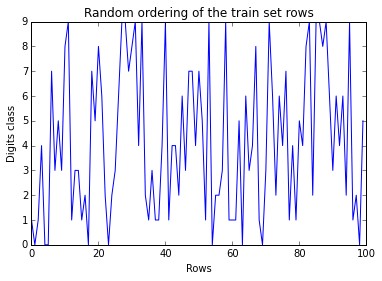

In [12]:
plt.plot(train.iloc[:100,0])
plt.ylabel('Digits class')
plt.xlabel('Rows')
plt.title('Random ordering of the train set rows')
plt.show()

### Distribition of the pixels values

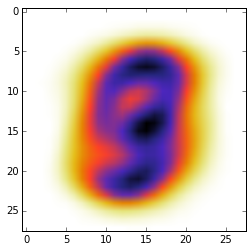

In [25]:
features = np.array(train.iloc[:,1:])

t_mean=[]
for i in range(784):
    t_mean.append(features[:,i].mean())
    
t_m_arr = np.array(t_mean)
t_m_arr = t_m_arr.reshape(28,28)

#plt.axis('off')
plt.imshow(t_m_arr, cmap=plt.cm.CMRmap_r)
plt.show()


### Preparing the data for sklearn model fitting

In [14]:
#separating the labels from the train set
labels = np.array(train.iloc[:,0])
features = np.array(train.iloc[:,1:])
print labels.shape
print features.shape

(42000L,)
(42000L, 784L)


In [15]:
#train-test-split
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state=531)

In [16]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(29400L, 784L) (12600L, 784L) (29400L,) (12600L,)
